In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 64
eval_period_list = [2,5,10]
dataset_name = 'MNIST'
Total_budget = 60
rand_list = []
noise = 'clean'
# Total_budget = 60
period = 5
Repeat = 5

path = 'exp2_MNIST'

In [4]:

# path = 'exp_10_2/'
for dataset_name in ['MNIST']:
    
    Models = np.zeros((7,Total_budget//period,Repeat ))
    
    Transpoint =  np.zeros((2,Repeat))
    
    for run_index in range(Repeat):

        filename = path+'/{}_Total_{}_batch_{}'.format(run_index,Total_budget,BATCH_SIZE)+dataset_name+'.npy'
        results = np.load(filename,allow_pickle=True)

#         results = [acc_entropy_list_f_all,acc_entropy_list_all,acc_base_list_f_all,acc_base_list_all,acc_rand_list,acc_test_rand,acc_test_gt_temp,acc_dpp_list_f_all,acc_dpp_list_all,acc_base2_list_f_all,acc_base2_list_all,acc_dpp_list_f_old_all,acc_dpp_old_list_all]=results
        [ acc_adpative_1_list_all,acc_adpative_2_list_all,acc_adpative_1_f_all,acc_adpative_2_f_all, \
               acc_entropy_list_f_all,acc_entropy_list_all,acc_base_list_f_all,acc_base_list_all,acc_rand_list,acc_rand_list_all, \
               acc_test_rand,acc_test_rand_all,acc_test_gt_temp,acc_dpp_list_f_all,acc_dpp_list_all,acc_base2_list_f_all,acc_base2_list_all,\
                   acc_dpp_list_f_old_all,acc_dpp_old_list_all,acc_margin_list_f_all,acc_margin_list_all,acc_test_gt,Status_list1,Status_list2] =results 
        
#         acc_all = np.mean(all_test[-20:])+acc_all
        rand_list.append(np.mean(np.array(acc_rand_list)[:,1,:]))
        
        Models[0,:,run_index] = np.mean(np.array(acc_adpative_1_list_all)[0,::period,1,-20:],axis=1)
        Models[1,:,run_index] = np.mean(np.array(acc_adpative_2_list_all)[0,::period,1,-20:],axis=1)
        Models[2,:,run_index] = np.mean(np.array(acc_dpp_old_list_all)[0,::period,1,-20:],axis=1)
        Models[3,:,run_index] = np.mean(np.array(acc_base2_list_all)[0,::period,1,-20:],axis=1)
        Models[4,:,run_index] = np.mean(np.array(acc_entropy_list_all)[0,::period,1,-20:],axis=1)
        Models[5,:,run_index] = np.mean(np.array(acc_base_list_all)[0,::period,1,-20:],axis=1)
        Models[6,:,run_index] = np.mean(np.array(acc_rand_list)[::period,1,-20:],axis=1)
        Transpoint[0,run_index] = np.mean(Status_list1)
        Transpoint[1,run_index] = np.mean(Status_list2)
        

In [5]:
eval_period_list = [5]

In [6]:

legend_00 =['RD-DPP (Bi-modal, phi=1)','RD-DPP (Bi-modal, phi=2)']

legend_1 = ['Greedy Rate Gain']
legend_2 = ['Marginal Rate Gain']
legend_3 = ['RD-DPP (Only Diversity)']
legend_5 = ['Uncertainty Dec.']
legend_8 = ['Min Margin Dec.']

legend_9 = ['Rand']

L = legend_00+legend_3+legend_2+legend_5+legend_8+legend_9

In [7]:
Summaray = np.zeros((7,Total_budget//period))
Summaray_var = np.zeros((7,Total_budget//period))
for j in range(7):
    for i in range(Total_budget//period):
        Summaray[j,i] = np.mean(Models[j,i,:])
        
        Summaray_var[j,i] = np.var(Models[j,i,:])

In [8]:
# ['rand','entropy','min-margin','margin gain','dpp','ada 0.5', 'ada 0.2']

In [9]:
# fig=plt.figure(dpi=500)
font1={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'bold'}#or large,small

       
plt.rcParams.update(font1)
plt.rcParams['text.usetex'] = False

# ax = fig.add_subplot(111)
# plt.rc('xtick', labelsize=18) 
# plt.rc('ytick', labelsize=18) 
# plt.rc('axes', labelsize=18) 
# plt.rc('axes', titlesize=18) 
# plt.rc('legend', fontsize=12)

In [10]:
def plot_with_variance(reward_mean, reward_std, color='yellow', savefig_dir=None,xaxis =None):
    """plot_with_variance
        reward_mean: typr list, containing all the means of reward summmary scalars collected during training
        reward_std: type list, containing all variance
        savefig_dir: if not None, this must be a str representing the directory to save the figure
    """
    half_reward_std = reward_std / 2.0
    lower = [x - y for x, y in zip(reward_mean, half_reward_std)]
    upper = [x + y for x, y in zip(reward_mean, half_reward_std)]
    if xaxis is None:
        xaxis = list(range(len(lower)))
    plt.plot(xaxis, reward_mean, color)
    plt.fill_between(xaxis, lower, upper, color=color[0], alpha=0.2)
    plt.grid()
#     plt.xlabel('Episode')
#     plt.ylabel('Average reward')
#     plt.title('The convergence of rewards')
    if savefig_dir is not None and type(savefig_dir) is str:
        plt.savefig(savefig_dir, format='svg')
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18) 
    plt.rc('axes', labelsize=18) 
    plt.rc('axes', titlesize=18) 
    plt.rc('legend', fontsize=12)
#     plt.show()

In [11]:
color_space = ['m', 'm', 'r','g','b','y' ,'k-.']
color_space = ['m', 'r','g','b','y' ,'k-.']
# Method_index = [5,6,4,3,1,2,0]
Method_index = [1,2,3,4,5,6]

In [12]:
Method_inde2x =  [0,1,2,3,4,5,6]

In [13]:
# plot_with_variance(Summaray[j,:],np.sqrt(Summaray_var[j,:]),color='m')

In [14]:
avg_trans = np.mean(Transpoint[1]*Total_budget//period)

In [15]:
# std_trans =  np.std(Transpoint[0]*Total_budget//period)

In [16]:
avg_trans

5.6

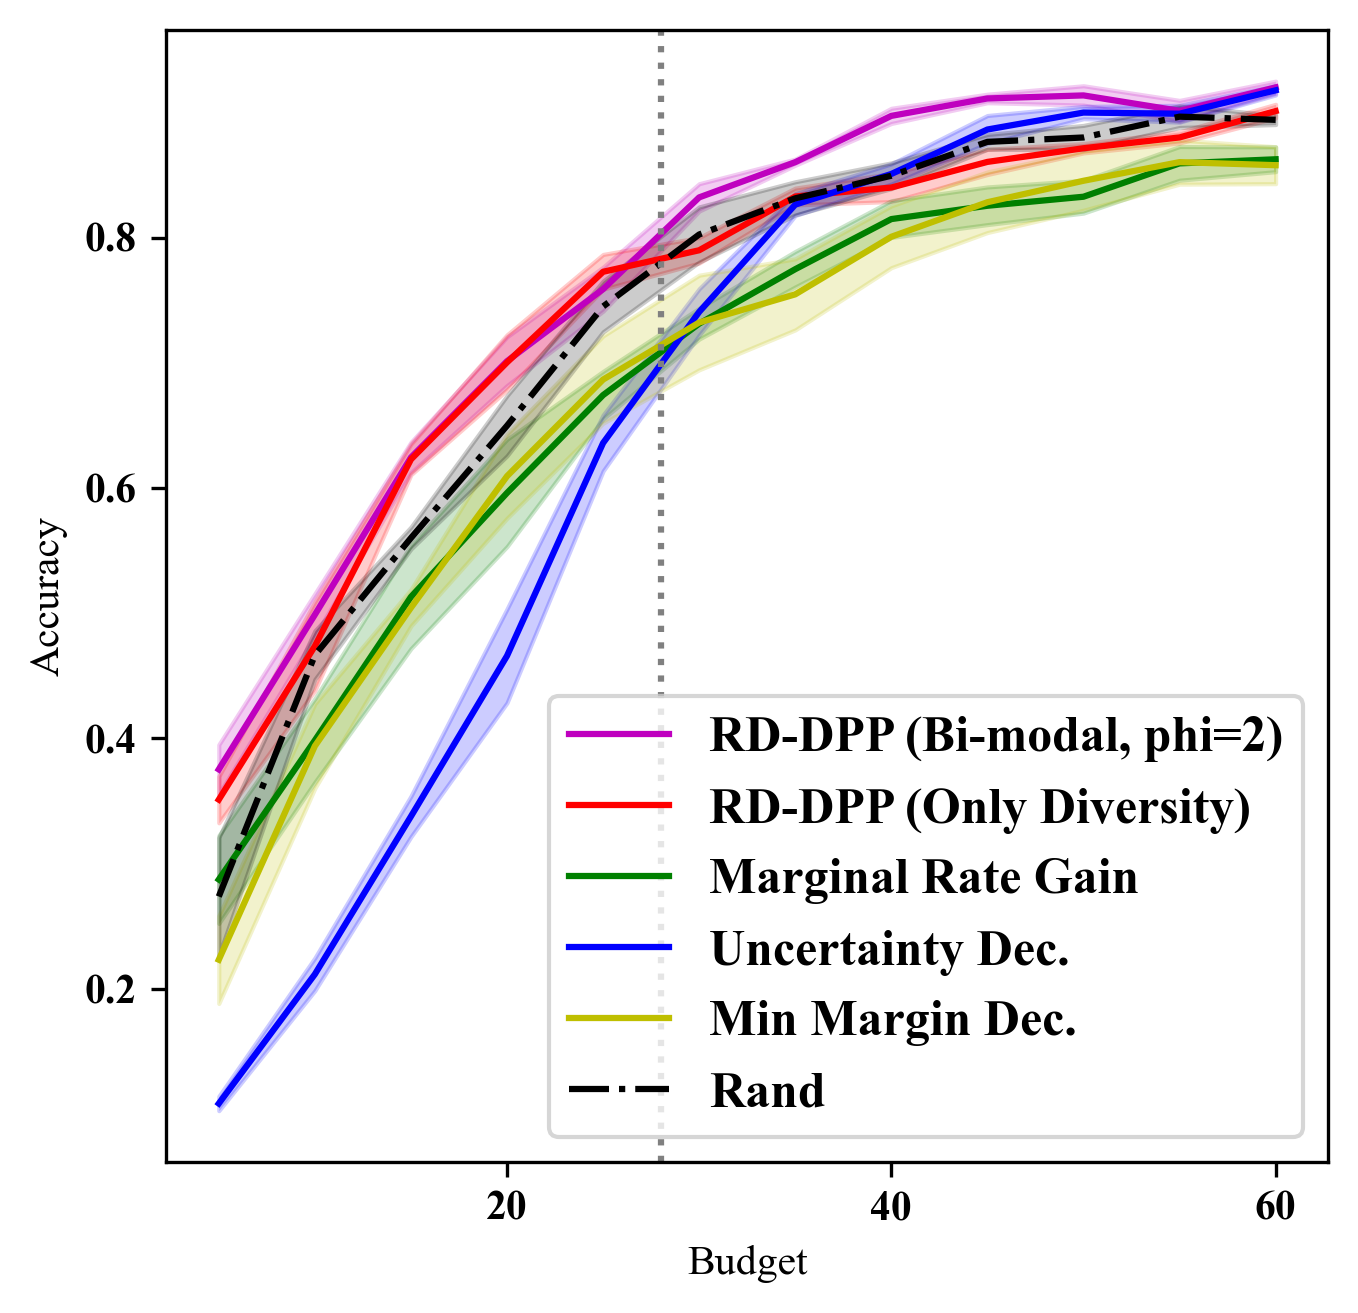

In [17]:
plt.figure(figsize= (5,5),dpi=300)

xaxis = np.array(range(1,1+Total_budget//period))*period

for j in range(6):
    if True:
        idx = Method_index[j]
        plot_with_variance(Summaray[idx,:],np.sqrt(Summaray_var[idx,:]),color = color_space[j],xaxis=xaxis)

plt.xlabel('Budget')
plt.ylabel('Accuracy')

plt.legend(np.array(L)[Method_index])

plt.axvline(avg_trans*period,color='gray',linestyle=':')
# plt.savefig(f'{dataset_name}.png', bbox_inches = 'tight')
plt.savefig(f'{dataset_name}_{noise}.png', bbox_inches = 'tight')

In [18]:
# save to csv


In [19]:
Method_inde2x = [0,1,2,3,4,5,6]

In [20]:
per1 = np.zeros((7,Total_budget//period),dtype=object)


In [21]:
Method_inde2x

[0, 1, 2, 3, 4, 5, 6]

In [22]:
S=Summaray[Method_inde2x,:]
SVAR = Summaray_var[Method_inde2x,:]

In [23]:
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per1[i,j] = format(S[i,j]*100,'.2f')

In [24]:
np.array(L)[Method_inde2x]

array(['RD-DPP (Bi-modal, phi=1)', 'RD-DPP (Bi-modal, phi=2)',
       'RD-DPP (Only Diversity)', 'Marginal Rate Gain',
       'Uncertainty Dec.', 'Min Margin Dec.', 'Rand'], dtype='<U24')

In [25]:
Method_inde2x

[0, 1, 2, 3, 4, 5, 6]

In [26]:
import pandas as pd
df1 = pd.DataFrame(per1, columns = xaxis, index =np.array(L)[Method_inde2x])


In [27]:
df1

,5,10,15,20,25,30,35,40,45,50,55,60
"RD-DPP (Bi-modal, phi=1)",30.06,52.88,60.33,70.77,76.88,82.02,86.00,88.99,90.25,90.80,92.14,91.56
"RD-DPP (Bi-modal, phi=2)",37.53,49.88,62.44,70.13,75.88,83.21,86.02,89.71,91.11,91.35,90.12,91.99
RD-DPP (Only Diversity),35.11,47.37,62.28,70.03,77.27,78.98,83.28,83.99,86.04,87.13,87.99,90.10
Marginal Rate Gain,28.73,39.85,51.30,59.61,67.42,73.12,77.47,81.47,82.54,83.26,85.92,86.25
Uncertainty Dec.,10.84,21.17,33.77,46.60,63.59,74.06,82.63,85.08,88.63,89.98,89.89,91.75
Min Margin Dec.,22.33,39.39,50.44,60.94,68.66,73.21,75.46,80.06,82.82,84.53,86.02,85.78
Rand,27.37,46.66,56.00,64.97,74.50,80.24,83.13,84.93,87.64,87.99,89.65,89.40


In [28]:
df1.to_csv(f'{dataset_name}_1_{noise}.csv') 

In [29]:
per2 = np.zeros((7,Total_budget//period),dtype=object)
for i in range(per1.shape[0]):
    for j in range(per1.shape[1]):
        per2[i,j] = format(S[i,j]*100,'.2f')+'+-'+format(np.sqrt(SVAR[i,j])*100,'.2f')

In [30]:
df2 = pd.DataFrame(per2, columns = xaxis, index =np.array(L)[Method_inde2x])


In [31]:
df2

,5,10,15,20,25,30,35,40,45,50,55,60
"RD-DPP (Bi-modal, phi=1)",30.06+-4.19,52.88+-2.93,60.33+-4.42,70.77+-8.43,76.88+-7.04,82.02+-3.32,86.00+-0.46,88.99+-1.86,90.25+-0.67,90.80+-0.41,92.14+-1.85,91.56+-1.19
"RD-DPP (Bi-modal, phi=2)",37.53+-3.95,49.88+-3.36,62.44+-2.44,70.13+-3.89,75.88+-3.51,83.21+-2.19,86.02+-0.49,89.71+-1.21,91.11+-0.68,91.35+-1.54,90.12+-1.67,91.99+-1.00
RD-DPP (Only Diversity),35.11+-3.71,47.37+-7.09,62.28+-2.45,70.03+-4.41,77.27+-2.77,78.98+-2.04,83.28+-1.34,83.99+-2.24,86.04+-2.02,87.13+-0.75,87.99+-0.89,90.10+-1.09
Marginal Rate Gain,28.73+-7.01,39.85+-6.67,51.30+-8.26,59.61+-8.57,67.42+-3.79,73.12+-2.46,77.47+-2.83,81.47+-2.94,82.54+-3.01,83.26+-2.62,85.92+-2.69,86.25+-1.98
Uncertainty Dec.,10.84+-1.14,21.17+-2.61,33.77+-3.24,46.60+-7.50,63.59+-4.47,74.06+-3.70,82.63+-1.74,85.08+-1.61,88.63+-2.24,89.98+-0.98,89.89+-1.34,91.75+-0.75
Min Margin Dec.,22.33+-6.99,39.39+-6.74,50.44+-2.91,60.94+-6.71,68.66+-6.97,73.21+-7.55,75.46+-5.68,80.06+-4.93,82.82+-4.84,84.53+-4.70,86.02+-3.52,85.78+-2.95
Rand,27.37+-9.40,46.66+-3.88,56.00+-1.75,64.97+-4.81,74.50+-4.04,80.24+-4.41,83.13+-2.65,84.93+-2.06,87.64+-1.18,87.99+-1.93,89.65+-1.73,89.40+-0.75


In [32]:
df2.to_csv(f'{dataset_name}_2_{noise}.csv') 

# example of diversity

In [33]:
div = np.load(path+'/0_Total_60_batch_64MNIST_div.npy')

Text(0, 0.5, 'sdiv')

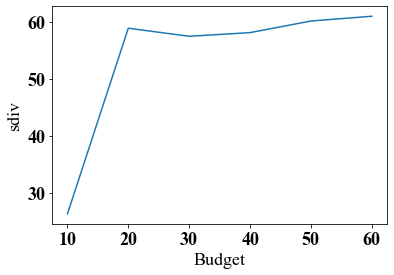

In [38]:
plt.plot(xaxis[1::2],div)
plt.xlabel('Budget')
plt.ylabel('sdiv')